In [58]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [59]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [60]:
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)
print(train_img.shape)

(60000, 784)


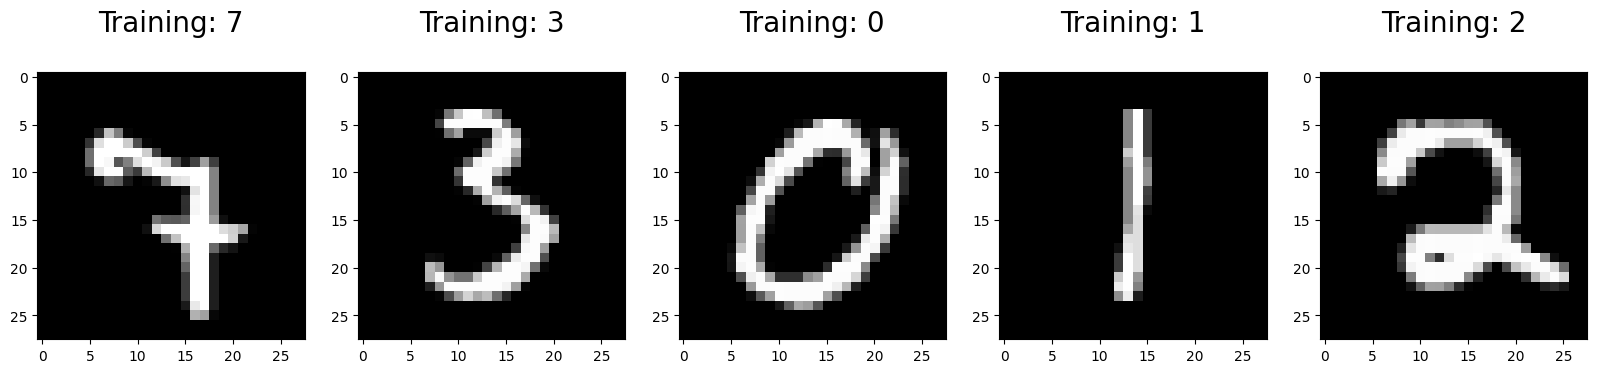

In [61]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize=20)

In [69]:
clf = MLPClassifier()
clf.fit(train_img, train_lbl)

MLPClassifier()

In [ ]:
predictions = clf.predict(test_img)

In [64]:
predictions_train = clf.predict(train_img)
predictions_test = clf.predict(test_img)
train_score = accuracy_score(predictions_train, train_lbl)
print('Score on train data: ', train_score)
test_score = accuracy_score(predictions_test, test_lbl)
print('Score on train data: ', test_score)

Score on train data:  0.9946666666666667
Score on train data:  0.9656


In [65]:
index = 0
badIndex = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    badIndex = badIndex+1
    if label != predict:
        misclassifiedIndexes.append(badIndex)
        print(misclassifiedIndexes[index], label,
              test_lbl[badIndex - 1], predict, predictions[badIndex - 1])
        index += 1
print(test_lbl[4], predictions[4])

79 8 8 2 2
198 8 8 3 3
225 9 9 4 4
254 7 7 9 9
269 8 8 2 2
274 9 9 3 3
300 3 3 0 0
313 7 7 2 2
323 8 8 0 0
333 3 3 2 2
338 3 3 8 8
348 9 9 1 1
382 9 9 2 2
395 8 8 7 7
396 1 1 8 8
423 3 3 0 0
429 2 2 9 9
433 4 4 6 6
569 3 3 0 0
592 9 9 8 8
596 2 2 3 3
606 5 5 9 9
618 4 4 7 7
644 1 1 2 2
648 9 9 5 5
664 2 2 7 7
673 8 8 6 6
674 3 3 2 2
679 8 8 3 3
750 8 8 2 2
779 2 2 0 0
788 8 8 9 9
806 1 1 2 2
827 2 2 7 7
834 8 8 5 5
930 1 1 2 2
943 5 5 1 1
999 8 8 3 3
1010 8 8 2 2
1058 8 8 9 9
1061 3 3 2 2
1086 8 8 3 3
1137 2 2 6 6
1149 5 5 2 2
1221 9 9 4 4
1225 6 6 0 0
1236 1 1 4 4
1275 3 3 5 5
1324 4 4 7 7
1353 7 7 2 2
1381 3 3 7 7
1386 7 7 2 2
1394 7 7 9 9
1405 5 5 3 3
1484 5 5 3 3
1491 3 3 8 8
1512 2 2 0 0
1584 4 4 7 7
1589 9 9 4 4
1685 8 8 2 2
1771 8 8 9 9
1881 4 4 9 9
1893 4 4 9 9
1949 5 5 8 8
2127 8 8 5 5
2207 4 4 8 8
2212 0 0 6 6
2214 8 8 3 3
2240 6 6 4 4
2247 1 1 8 8
2253 3 3 5 5
2290 9 9 4 4
2291 2 2 0 0
2296 4 4 9 9
2356 9 9 4 4
2408 8 8 3 3
2462 5 5 3 3
2477 5 5 8 8
2502 2 2 3 3
2518 7 7 9 9

79 2 8
198 3 8
225 4 9
254 9 7
269 2 8


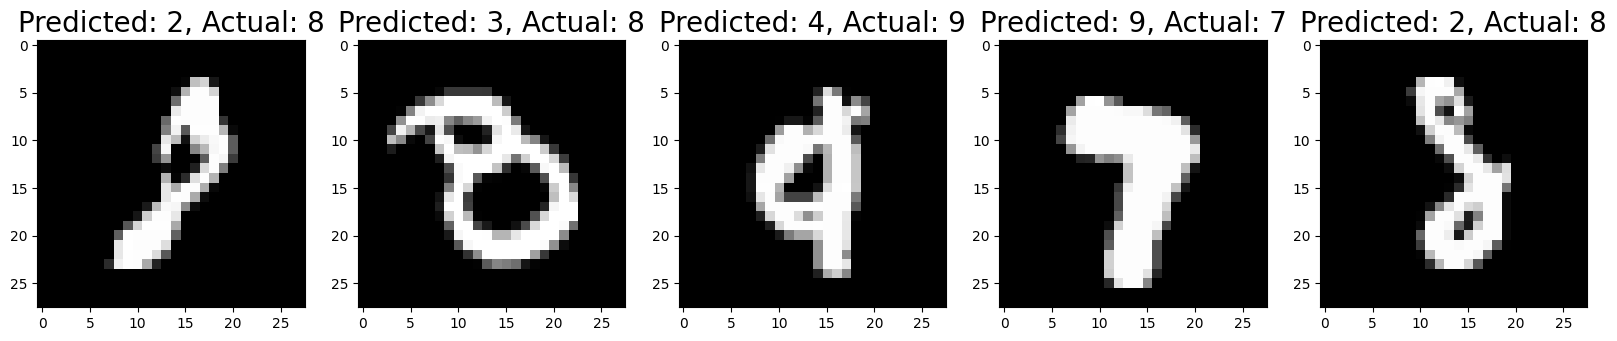

In [66]:
plt.figure(figsize=(20, 4))
for plotIndex, badIndex, in enumerate(misclassifiedIndexes[0:5]):
    print(badIndex, predictions[badIndex - 1], test_lbl[badIndex - 1])
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex-1], (28, 28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(
        predictions[badIndex - 1], test_lbl[badIndex-1]), fontsize=20)

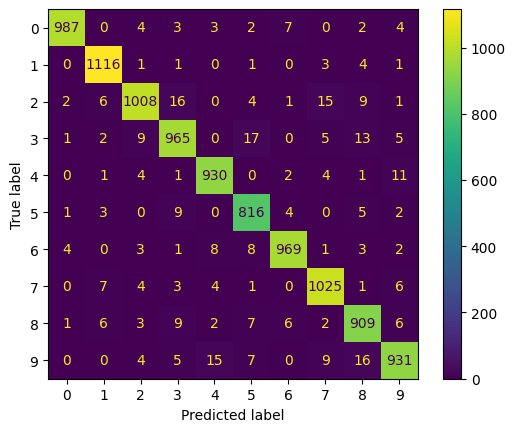

In [67]:
ConfusionMatrixDisplay.from_predictions(predictions_test, test_lbl)
plt.show()